In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")


# Data Reading

In [ ]:
#Read data from csv files
flights = pd.read_csv('./flights.csv')   
flights.columns = ['Year','Month','Day','Day of Week','Airline','Flight number','Tail number','Origin airport',
                      'Destination airport','Scheduled departure','Departure time','Departure delay','Taxi out',
                      'Wheels off','Scheduled time','Elapsed time','Air time','Distance','Wheels on','Taxi in',
                       'Scheduled arrival','Arrival time','Arrival delay','Arrival delay status','Diverted','Cancelled',
                       'On time','Y','Cancelled reason','Air system delay','Security delay','Airline delay','Late aircraft delay',
                       'Weather delay']
            
airline_data = pd.read_csv('./airlines.csv')
airline_data.columns = ['IATA code','Airline']
airports = pd.read_csv('./airports.csv')
airports.columns = ['IATA code','Airport','City','State','Country','Latitude','Longitude']



In [ ]:
flights.head(5)


,Year,Month,Day,Day of Week,Airline,Flight number,Tail number,Origin airport,Destination airport,Scheduled departure,...,Diverted,Cancelled,On time,Y,Cancelled reason,Air system delay,Security delay,Airline delay,Late aircraft delay,Weather delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights.dtypes

Year                      int64
Month                     int64
Day                       int64
Day of Week               int64
Airline                  object
Flight number             int64
Tail number              object
Origin airport           object
Destination airport      object
Scheduled departure       int64
Departure time          float64
Departure delay         float64
Taxi out                float64
Wheels off              float64
Scheduled time          float64
Elapsed time            float64
Air time                float64
Distance                  int64
Wheels on               float64
Taxi in                 float64
Scheduled arrival         int64
Arrival time            float64
Arrival delay           float64
Arrival delay status      int64
Diverted                  int64
Cancelled                 int64
On time                   int64
Y                         int64
Cancelled reason         object
Air system delay        float64
Security delay          float64
Airline 

In [ ]:
airline_data.head(5)

,IATA code,Airline
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
airports.head(5)

,IATA code,Airport,City,State,Country,Latitude,Longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
# creating new variables and renaming 
flights['DepDate'] = pd.to_datetime(flights.Year*10000+flights.Month*100+flights.Day,format='%Y%m%d')#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in flights:
    flights.loc[flights['Arrival delay'] <= 15, 'Status'] = 0
    flights.loc[flights['Arrival delay'] >= 15, 'Status'] = 1
    flights.loc[flights['Arrival delay'] >= 60, 'Status'] = 2
    flights.loc[flights['Diverted'] == 1, 'Status'] = 3
    flights.loc[flights['Cancelled'] == 1, 'Status'] = 4
status = ['On time','Slightly delay','Highly delay','Diverted','Cancelled']

In [ ]:
#Cancellation cause
#0 for Airsystem delay
#1 for Airline delay
#2 for late aircraft delay
#3 for security delay
flights.loc[flights["Cancelled reason"] =="A", 'Cancelled reason'] = "0"
flights.loc[flights["Cancelled reason"] =="B", 'Cancelled reason'] = "1"
flights.loc[flights["Cancelled reason"] =="C", 'Cancelled reason'] = "2"
flights.loc[flights["Cancelled reason"] =="D", 'Cancelled reason'] = "3"

#Array for mapping flight cancellation reasons
Creason = ['Airsystem delay','Airline delay','Late aircraft delay','Security delay']

# Data Analysis

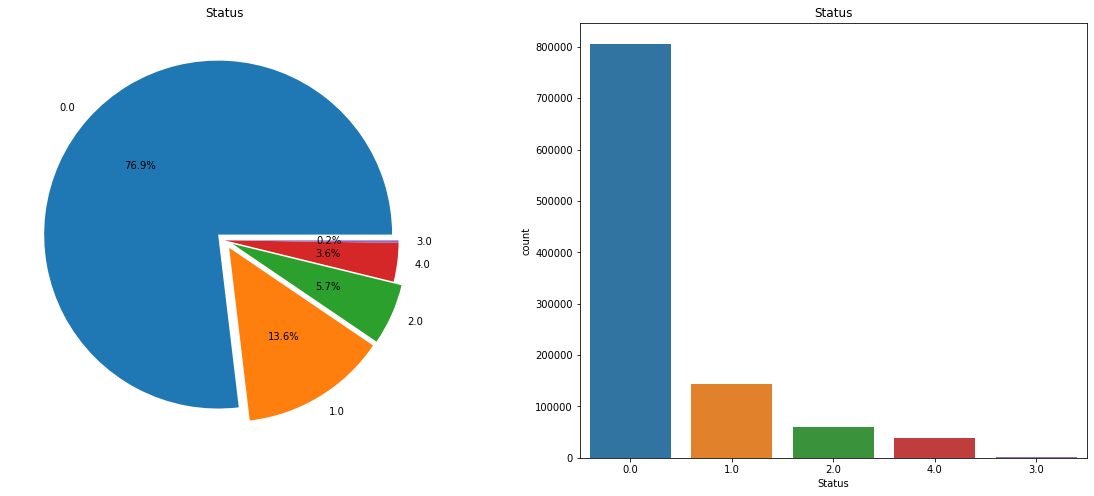

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
flights['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = flights['Status'].value_counts().index, data=flights,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

Mostly the flights were on time. Other than that some flights faced a slight delay.

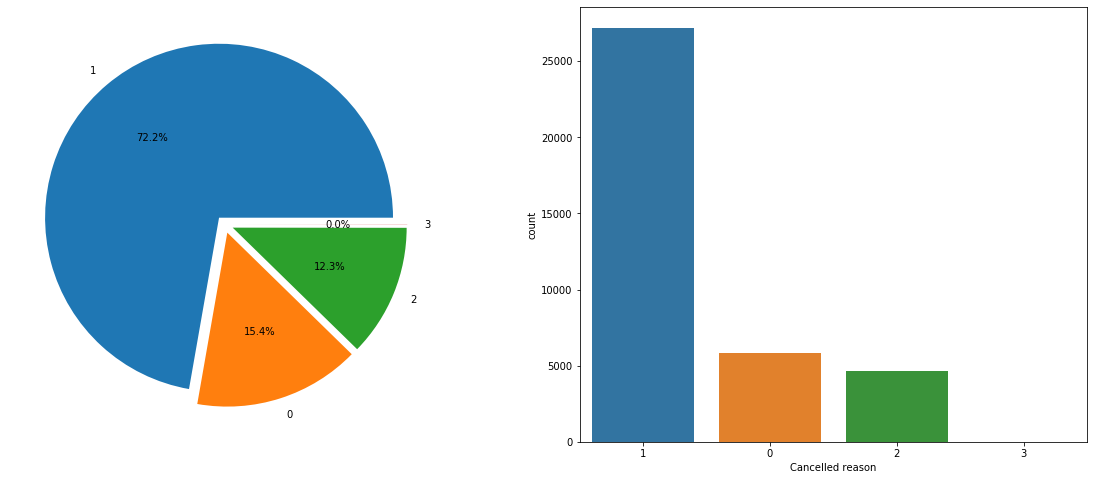

0 = Air system delay, 1 = Airline delay, 2 = Late aircraft delay, 3 = Security delay


In [ ]:
CancFlights = flights[(flights.Status == 4)]

f,ax=plt.subplots(1,2,figsize=(20,8))
CancFlights['Cancelled reason'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_ylabel('')
sns.countplot('Cancelled reason', order = CancFlights['Cancelled reason'].value_counts().index, data=CancFlights, ax=ax[1])
plt.show()


print('0 = Air system delay, 1 = Airline delay, 2 = Late aircraft delay, 3 = Security delay')

most of the delays in flight occured due to "Airline delay", Other to reasons are "Air system delay" and "Late aircraft delay"

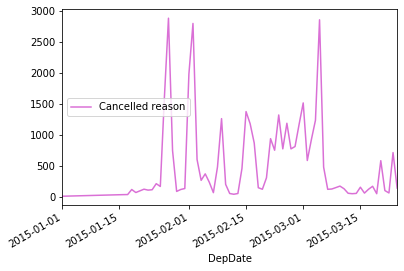

In [ ]:
CancFlights[['DepDate','Cancelled reason']].groupby(['DepDate']).count().plot(color='orchid')
plt.show()

In [ ]:
Delayedflights = flights[(flights.Status >= 1) &(flights.Status < 3)]
Delayedflights.head(5)


,Year,Month,Day,Day of Week,Airline,Flight number,Tail number,Origin airport,Destination airport,Scheduled departure,...,On time,Y,Cancelled reason,Air system delay,Security delay,Airline delay,Late aircraft delay,Weather delay,DepDate,Status
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,...,0,0,NaN,25.0,0.0,0.0,0.0,0.0,2015-01-01,1.0
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,...,0,0,NaN,43.0,0.0,0.0,0.0,0.0,2015-01-01,1.0
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,145,...,0,0,NaN,0.0,0.0,15.0,0.0,0.0,2015-01-01,1.0
50,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,...,0,0,NaN,20.0,0.0,0.0,0.0,0.0,2015-01-01,1.0
52,2015,1,1,4,B6,2134,N307JB,SJU,MCO,400,...,0,0,NaN,0.0,0.0,85.0,0.0,0.0,2015-01-01,2.0


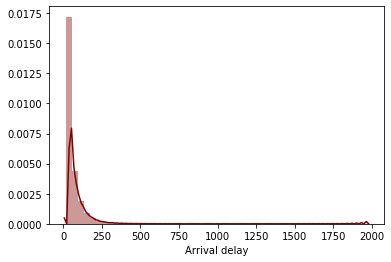

In [ ]:
sns.distplot(Delayedflights['Arrival delay'],color='maroon')
plt.show()

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % Delayedflights['Arrival delay'].skew())
print("Kurtosis: %f" % Delayedflights['Arrival delay'].kurt())

Skewness: 5.578257
Kurtosis: 65.499170


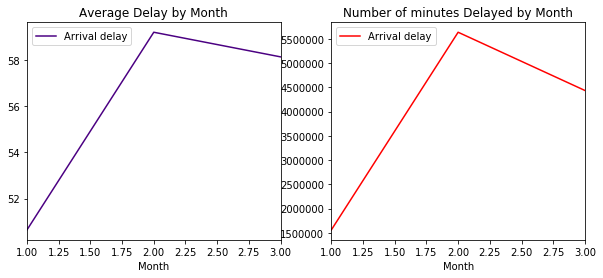

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,4))
Delayedflights[['Month','Arrival delay']].groupby(['Month']).mean().plot(ax=ax[0],color='indigo')
ax[0].set_title('Average Delay by Month')
Delayedflights[['Month','Arrival delay']].groupby(['Month']).sum().plot(ax=ax[1],color='Red')
ax[1].set_title('Number of minutes Delayed by Month')
plt.show()

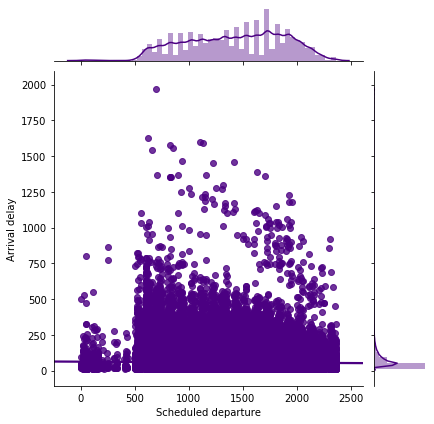

In [ ]:
sns.jointplot(x='Scheduled departure',y='Arrival delay',data=Delayedflights,kind='reg', color='indigo',fit_reg = True)
plt.show()

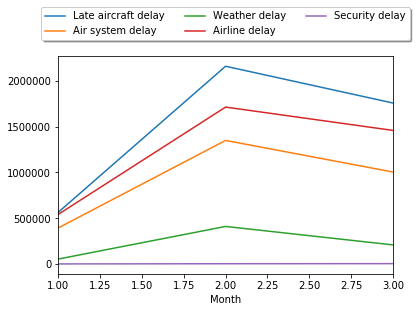

In [ ]:
dataframe = Delayedflights.filter(['Month','Air system delay','Weather delay','Airline delay','Security delay','Late aircraft delay'], axis=1)
dataframe = dataframe.groupby('Month')['Late aircraft delay','Air system delay','Weather delay','Airline delay','Security delay'].sum().plot()
dataframe.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()


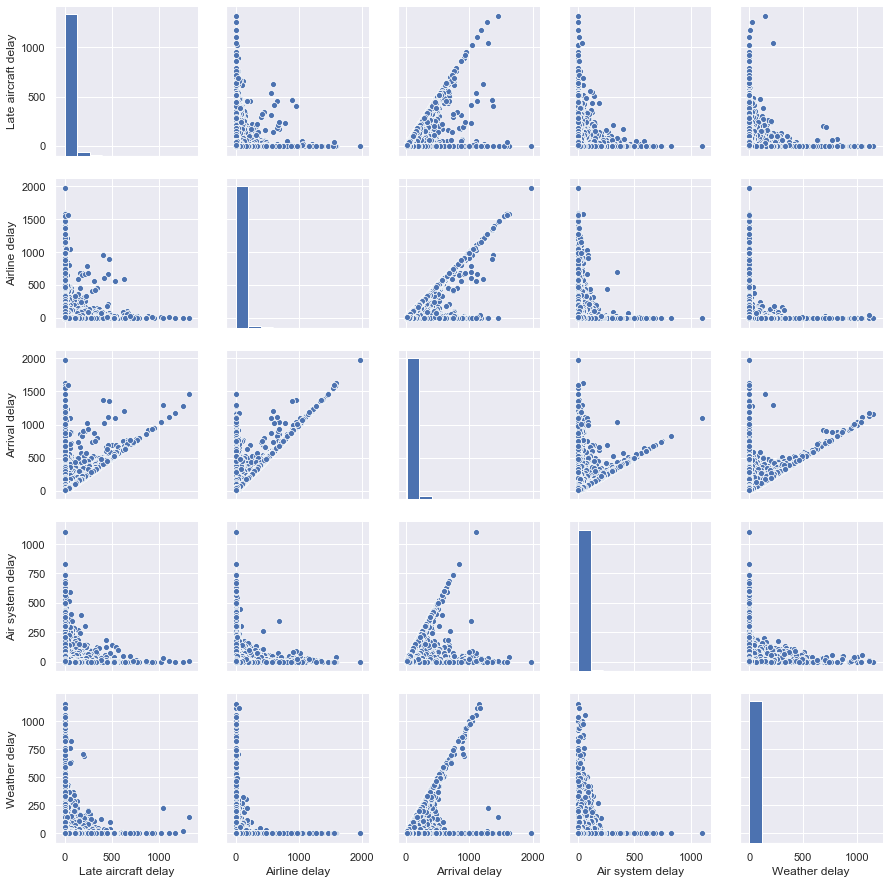

In [ ]:
#scatterplot
sns.set(style='darkgrid', palette='deep',color_codes=True)
cols = ['Late aircraft delay', 'Airline delay','Arrival delay', 'Air system delay','Weather delay']
sns.pairplot(Delayedflights[cols], size = 2.5, palette="rocket")
plt.show()

In [ ]:
#Priniting Air line names
print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [ ]:
#Printing Count of each Airline
print(flights['Airline'].value_counts())

WN    223370
DL    150071
EV    111038
OO    106053
AA     96926
UA     88495
US     73320
MQ     63489
B6     47804
AS     29729
NK     19700
F9     14451
HA     13876
VX     10253
Name: Airline, dtype: int64


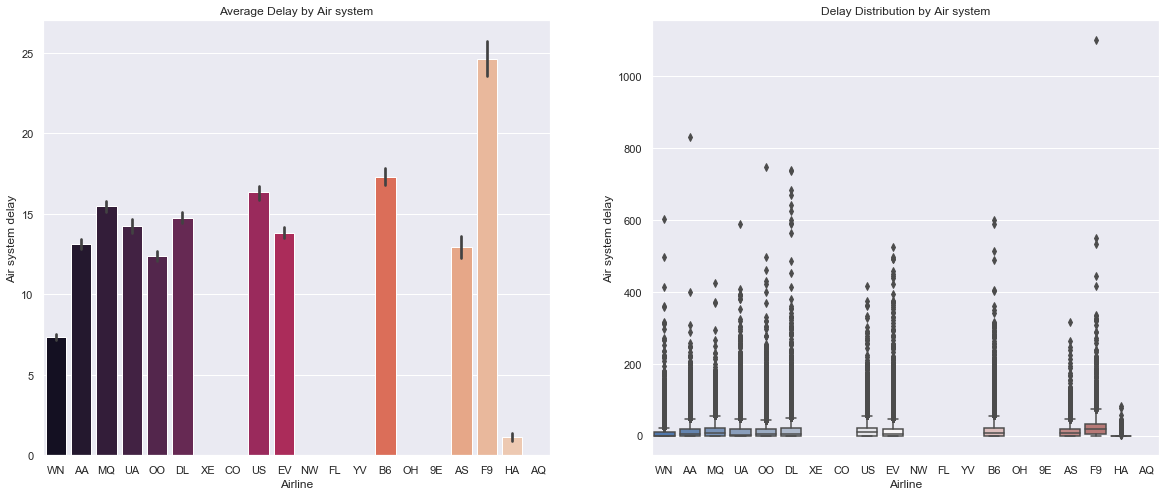

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Airline','Air system delay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'],palette="rocket")
ax[0].set_title('Average Delay by Air system')
sns.boxplot('Airline','Air system delay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'],palette="vlag")
ax[1].set_title('Delay Distribution by Air system')
plt.close(2)
plt.show()

# Data Predictions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler #used to scale features
from sklearn.model_selection import RandomizedSearchCV #will be used to create hyperparameter grid for random forest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.decomposition import PCA  
from sklearn.cluster import KMeans

## Naive Bayes Algorithm to extract meaningful information and perfrom predictions

In [ ]:
data = flights[['Airline','Flight number','Tail number','Origin airport','Destination airport','Scheduled departure',
                'Departure time','Departure delay','Taxi out','Wheels off','Scheduled time','Elapsed time','Air time',
                'Distance','Wheels on','Taxi in','Scheduled arrival','Arrival time','Arrival delay','Arrival delay status','Diverted','On time','Cancelled','Cancelled reason','Status']]
#Fill nan values with 0
data = data.fillna(0)
#Store index of column "Airline" and "Flight number"
airline_index = data.columns.get_loc("Airline")
flightNo_index = data.columns.get_loc("Flight number")



In [ ]:
def NaiveBayes(dataset,target):
    xtrain_, xtest_, ytrain, ytest = train_test_split(dataset,target, test_size = 0.30, random_state = 10)
    #remove all those columns that belongs to "object" type
    xtrain=xtrain_.select_dtypes(exclude=['object'])
    xtest=xtest_.select_dtypes(exclude=['object'])
    #create an object of the type GaussianNB
    gnb = GaussianNB()
    #train the algorithm on training data and predict using the testing data
    pred = gnb.fit(xtrain, ytrain).predict(xtest)
    print("Accuracy to predict whether the flight is cancelled or not : ",accuracy_score(ytest, pred, normalize = True))
    return pred,xtest_

#### Predict whether the flight of an airline will be on time or not

In [ ]:

cols = [col for col in data.columns if col not in ['On time']]
dataset = data[cols]
target = data['On time']
pred,xtest_ = NaiveBayes(dataset,target)
#Convert xtest_ to numpy so to keep a record of predictions with test dataset examples
xtest_ = xtest_.to_numpy()
print(pred)
print()
#Airline flights that are on time
for i in range(10):
    if(pred[i] != 0):
        print(xtest_[i][airline_index],"airline with flight number ",xtest_[i][flightNo_index],"is on time ")

Accuracy to predict whether the flight is cancelled or not :  0.9983851125176032
[0 0 1 ... 0 0 1]

WN airline with flight number  4101 is on time 
WN airline with flight number  1974 is on time 
DL airline with flight number  11 is on time 
US airline with flight number  1905 is on time 
EV airline with flight number  4740 is on time 
DL airline with flight number  2172 is on time 


#### Predict whether the flight of an airline will be cancelled or not

In [ ]:

cols = [col for col in data.columns if col not in ['Cancelled']]
dataset = data[cols]
target = data['Cancelled']
pred,xtest_ = NaiveBayes(dataset,target)
#Convert xtest_ to numpy so to keep a record of predictions with test dataset examples
xtest_ = xtest_.to_numpy()
print(pred)
#Airline flights that are cancelled
for i in range(500):
    if(pred[i] != 0):
        print(xtest_[i][airline_index],"airline with flight number ",xtest_[i][flightNo_index],"was cancelled ")

Accuracy to predict whether the flight is cancelled or not :  0.9979400647862341
[0 0 0 ... 0 0 0]
EV airline with flight number  4131 was cancelled 
VX airline with flight number  161 was cancelled 
EV airline with flight number  4537 was cancelled 
MQ airline with flight number  3400 was cancelled 
MQ airline with flight number  3478 was cancelled 
EV airline with flight number  2516 was cancelled 
UA airline with flight number  210 was cancelled 
US airline with flight number  2105 was cancelled 
MQ airline with flight number  3034 was cancelled 
AA airline with flight number  1426 was cancelled 
B6 airline with flight number  777 was cancelled 


#### Predict Cancellation reason of Airline flights

In [ ]:

cols = [col for col in data.columns if col not in ['Cancelled reason']]
dataset = data[cols]
target = pd.to_numeric(data['Cancelled reason'])
pred,xtest_ = NaiveBayes(dataset,target)
#Convert xtest_ to numpy so to keep a record of predictions with test dataset examples
xtest_ = xtest_.to_numpy()
print(pred)
x=0

#Flight cancellation reasons of airlines
for i in range(100):
    if(pred[i]!=0):
        print(xtest_[i][airline_index],"airline with flight number ",xtest_[i][flightNo_index],"was cancelled due to ",Creason[pred[i]])
                
        

Accuracy to predict whether the flight is cancelled or not :  0.9854119711481913
[0 0 0 ... 0 0 0]
EV airline with flight number  4131 was cancelled due to  Airline delay
VX airline with flight number  161 was cancelled due to  Airline delay
EV airline with flight number  4537 was cancelled due to  Airline delay


#### Predict which Airline Flights have Arrival delay

In [ ]:

cols = [col for col in data.columns if col not in ['Arrival delay status']]
dataset = data[cols]
target = data['Arrival delay status']
pred,xtest_ = NaiveBayes(dataset,target)
print(pred)
#Convert xtest_ to numpy so to keep a record of predictions with test dataset examples
xtest_ = xtest_.to_numpy()
#Airline flights that have more Arrival delay
for i in range(30):
    if(pred[i] != 0):
        print(xtest_[i][airline_index],"airline with flight number ",xtest_[i][flightNo_index]," Arrived late ")

Accuracy to predict whether the flight is cancelled or not :  0.9984232594660063
[1 1 0 ... 1 1 0]
B6 airline with flight number  748  Arrived late 
UA airline with flight number  1460  Arrived late 
WN airline with flight number  1980  Arrived late 
DL airline with flight number  1948  Arrived late 
DL airline with flight number  1113  Arrived late 
WN airline with flight number  4834  Arrived late 
AA airline with flight number  1574  Arrived late 
EV airline with flight number  6023  Arrived late 
UA airline with flight number  1259  Arrived late 
UA airline with flight number  1025  Arrived late 
UA airline with flight number  263  Arrived late 
EV airline with flight number  2542  Arrived late 
US airline with flight number  895  Arrived late 
WN airline with flight number  478  Arrived late 
OO airline with flight number  6214  Arrived late 
US airline with flight number  718  Arrived late 


#### Predict whether the flight of an airline will be Diverted or not

In [ ]:

cols = [col for col in data.columns if col not in ['Diverted']]
dataset = data[cols]
target = data['Diverted']
pred,xtest_ = NaiveBayes(dataset,target)
#Convert xtest_ to numpy so to keep a record of predictions with test dataset examples
xtest_ = xtest_.to_numpy()
print(pred)
print()
#Airline flights that are Diverted
for i in range(500):
    if(pred[i] != 0):
        print(xtest_[i][airline_index],"airline with flight number ",xtest_[i][flightNo_index],"was Diverted ")

Accuracy to predict whether the flight is cancelled or not :  0.9998601278558554
[0 0 0 ... 0 0 0]

US airline with flight number  745 was Diverted 
UA airline with flight number  1729 was Diverted 


## Random Forest algorithm to perform predictions

In [ ]:
def RandomForest(dataset,target):
    #First divide Data into test set
    xtrain_, xtest_, ytrain, ytest = train_test_split(dataset,target, test_size = 0.30, random_state = 10)
    #First divide Data into validation set
    xtrain_, xval_, ytrain, yval = train_test_split(dataset,target, test_size = 0.20, random_state = 10)
    #remove all those columns that belongs to "object" type
    xtrain=xtrain_.select_dtypes(exclude=['object'])
    xtest=xtest_.select_dtypes(exclude=['object'])
    xval=xval_.select_dtypes(exclude=['object'])
    #Scale features
    sc = StandardScaler()
    xtrain = sc.fit_transform(xtrain)
    xtest = sc.transform(xtest)
    xval = sc.transform(xval)
    #Tune hyperparameters for random forest
    # Number of trees in random forest
    estimator = 4
    # Number of features to consider at every split
    # Maximum number of levels in tree
    depth = 5
    # First create the base model to tune
    #Create object of random forest classifier
    clf = RandomForestClassifier(n_estimators = 5,max_features = 'sqrt',max_depth = 5,random_state=10)
    clf.fit(xtrain, ytrain)
    #Predict class using this model
    pred = clf.predict(xval)
    score=accuracy_score(yval, pred, normalize = True)
    run = True
    while(run):
        estimator += 2
        depth += 1
        clf1 = RandomForestClassifier(n_estimators = estimator ,max_features = 'sqrt',max_depth =depth,random_state=10)
        clf1.fit(xtrain, ytrain)
        #Predict class using this model
        pred = clf1.predict(xval)
        tmp = accuracy_score(yval, pred, normalize = True)
        if(score < tmp):
            print("Accuracy score at each iteration of hyperparameters: ",score)
            score = tmp
        else:
            run = False
            estimator -= 2
            depth -=1
    #Now predcit classes for test dataset
    print("\nNumber of trees in Random forest will be: ",estimator,"\nDepth of each tree will be: ",depth)
    model = RandomForestClassifier(n_estimators = estimator ,max_features = 'sqrt',max_depth =depth,random_state=10)
    model.fit(xtrain, ytrain)
    #Predict class using this model
    pred = model.predict(xtest)
    print("\nAccuracy score to predict Test dataset examples is ",accuracy_score(ytest, pred, normalize = True))
    print()
    return pred,xtest_


#### Predict whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)

In [ ]:
cols = [col for col in data.columns if col not in ['Status']]
dataset = data[cols]
target = data['Status']
pred,xtest_ = RandomForest(dataset,target)
#Convert xtest_ to numpy so to keep a record of predictions with test dataset examples
xtest_ = xtest_.to_numpy()
#Flight cancellation reasons of airlines
for i in range(10):
    print(xtest_[i][airline_index],"airline with flight number ",xtest_[i][flightNo_index],"was ",status[int(pred[i])])
                
        

Accuracy score at each iteration of hyperparameters:  0.9862480032424957
Accuracy score at each iteration of hyperparameters:  0.9997138974322295
Accuracy score at each iteration of hyperparameters:  0.9998283384593377

Number of trees in Random forest will be:  10 
Depth of each tree will be:  8

Accuracy score to predict Test dataset examples is  0.9998410543816538

B6 airline with flight number  748 was  Highly delay
UA airline with flight number  1460 was  On time
WN airline with flight number  4101 was  On time
WN airline with flight number  1974 was  On time
DL airline with flight number  11 was  On time
US airline with flight number  1905 was  On time
EV airline with flight number  4740 was  On time
DL airline with flight number  2172 was  On time
WN airline with flight number  1980 was  Slightly delay
DL airline with flight number  1948 was  Slightly delay


## Regression Algorithm to  perfrom predictions

In [ ]:
def RegressionAlgorithm(data,Y):
    xtrain_, xtest_, ytrain, ytest = train_test_split(data,Y,test_size=0.30,random_state=10,shuffle=True)
    xtrain=xtrain_.select_dtypes(exclude=['object'])
    xtest=xtest_.select_dtypes(exclude=['object'])
    ytest = ytest.to_numpy()
    xtest_ = xtest_.to_numpy()
    #Perform feature scaling 
    scaler = MinMaxScaler(feature_range = (0,1))
    #Scale data between 0 and 1
    scaler.fit(xtrain)
    xtrain = scaler.transform(xtrain)
    xtest = scaler.transform(xtest)
    #Tune Hyperparameters using grid search

    param_grid = {'polynomialfeatures__degree': np.arange(3)}
                 # 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
    clf= GridSearchCV(PolynomialRegression(), param_grid, scoring='neg_mean_squared_error')

    #Define linear model
    clf.fit(xtrain,ytrain)
    pred = clf.predict(xtest)   
    pred = pred.astype(int)
    return pred,xtest_

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

#### Predict for the given data what can be "Arrival time" for a flight i.e. at what time flight will actually arrive

In [ ]:
dataset = flights[['Airline','Flight number','Tail number','Origin airport','Destination airport','Scheduled departure',
            'Departure time','Departure delay','Taxi out','Wheels off','Scheduled time','Elapsed time','Air time',
            'Distance','Wheels on','Taxi in','Arrival time']]
data = dataset.fillna(0)
cols = [col for col in data.columns if col not in ['Arrival time']]
X = data[cols]  
Y = data['Arrival time']
result = RegressionAlgorithm(data,Y)
pred = result[0]
xtest_ = result[1]
print("Actual Arrival of flights\n")
for i in range(10):
    print(xtest_[i][airline_index]," airline with flight number ",xtest_[i][flightNo_index]," actually arrive at ",pred[i])


Actual Arrival of flights

B6  airline with flight number  748  actually arrive at  2251
UA  airline with flight number  1460  actually arrive at  2138
WN  airline with flight number  4101  actually arrive at  1845
WN  airline with flight number  1974  actually arrive at  957
DL  airline with flight number  11  actually arrive at  1852
US  airline with flight number  1905  actually arrive at  801
EV  airline with flight number  4740  actually arrive at  620
DL  airline with flight number  2172  actually arrive at  1917
WN  airline with flight number  1980  actually arrive at  1900
DL  airline with flight number  1948  actually arrive at  2046


####  Predict for the given dataset what can be the "Distance" for flight needed to be covered i.e. when a fligh is expected to depart

In [ ]:
data = flights[['Airline','Flight number','Tail number','Origin airport','Destination airport','Scheduled arrival',
            'Departure time','Departure delay','Taxi out','Wheels off','Scheduled time','Elapsed time','Air time',
            'Distance','Wheels on','Taxi in','Scheduled departure','Scheduled time','Arrival time',]]
data = data.fillna(0)
cols = [col for col in data.columns if col not in ['Distance']]
data = data[cols]    
Y = flights['Distance']
result = RegressionAlgorithm(data,Y)
pred = result[0]
xtest_ = result[1]
print("Distance needed to be covered by flights\n")
for i in range(10):
    print(xtest_[i][airline_index]," airline with flight number ",xtest_[i][flightNo_index],
          " is expected to cover",pred[i]," distance")

Distance needed to be covered by flights

B6  airline with flight number  748  is expected to cover 2229  distance
UA  airline with flight number  1460  is expected to cover 1404  distance
WN  airline with flight number  4101  is expected to cover 340  distance
WN  airline with flight number  1974  is expected to cover 755  distance
DL  airline with flight number  11  is expected to cover 1033  distance
US  airline with flight number  1905  is expected to cover 2223  distance
EV  airline with flight number  4740  is expected to cover 144  distance
DL  airline with flight number  2172  is expected to cover 443  distance
WN  airline with flight number  1980  is expected to cover 236  distance
DL  airline with flight number  1948  is expected to cover 1106  distance


#### Predict for the given data what can be "Departure time" for a flight i.e. at what time flight will actually depart 

In [ ]:
dataset = flights[['Airline','Flight number','Scheduled departure','Taxi out','Departure time']]
data = dataset.fillna(0)
cols = [col for col in data.columns if col not in ['Departure time']]
X = data[cols]  
Y = data['Departure time']
result = RegressionAlgorithm(data,Y)
pred = result[0]
xtest_ = result[1]
print("Actual Departure of flights\n")
for i in range(10):
    print(xtest_[i][airline_index]," airline with flight number ",xtest_[i][flightNo_index]," actually at ",pred[i])

Actual Departure of flights

B6  airline with flight number  748  actually at  1442
UA  airline with flight number  1460  actually at  1632
WN  airline with flight number  4101  actually at  1736
WN  airline with flight number  1974  actually at  832
DL  airline with flight number  11  actually at  1717
US  airline with flight number  1905  actually at  14
EV  airline with flight number  4740  actually at  518
DL  airline with flight number  2172  actually at  1737
WN  airline with flight number  1980  actually at  1747
DL  airline with flight number  1948  actually at  1757


## K Nearest Neighbour to perform predictions

In [ ]:
def KNN(data,Y):
    xtrain_, xtest_, ytrain, ytest = train_test_split(data,Y,test_size=0.30,random_state=10,shuffle=True)
    xtrain=xtrain_.select_dtypes(exclude=['object'])
    xtest=xtest_.select_dtypes(exclude=['object'])
    ytest = ytest.to_numpy()
    xtest_ = xtest_.to_numpy()
    n_neighbors = list(range(4,7)) 
    score=0
    for k in n_neighbors:
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(xtrain,ytrain)
        pred = neigh.predict(xtest)
        sc=neigh.score(xtest,ytest)
        print("Score with nearest neighbor ",k," is ",sc)
        if(sc > score):
            predictions = pred
            score = sc
        else:
            break
    #evaluation(Accuracy)
    print("Accuracy:",metrics.accuracy_score(predictions,ytest))
    print()
    #evaluation(Confusion Metrix)
    print("Confusion Metrix:\n",metrics.confusion_matrix(predictions,ytest))
    return pred,xtest_


#### Predict Airline Flight Status using KNN  

In [ ]:
data = flights[['Airline','Flight number','Tail number','Origin airport','Destination airport','Scheduled departure',
                'Departure time','Departure delay','Taxi out','Wheels off','Scheduled time','Elapsed time','Air time',
                'Distance','Wheels on','Taxi in','Scheduled arrival','Arrival time','Arrival delay','Arrival delay status',
                'Diverted','On time','Cancelled','Cancelled reason','Status']]   

data = data.fillna(0)
cols = [col for col in data.columns if col not in ['Status']]
X = data[cols]  
Y = data['Status']
pred,xtest_=KNN(X,Y)
print()
for i in range(10):
    print(xtest_[i][airline_index],"airline with flight number ",xtest_[i][flightNo_index],"was ",status[int(pred[i])])
                

Score with nearest neighbor  4  is  0.914738391406764
Score with nearest neighbor  5  is  0.9201425424305328
Score with nearest neighbor  6  is  0.9101194317376253
Accuracy: 0.9201425424305328

Confusion Metrix:
 [[239027  16542    174    124     29]
 [  2961  25535   4327    116      7]
 [     6    650  13314     62     44]
 [     0      0      2    377     44]
 [     1      3     12     17  11199]]

B6 airline with flight number  748 was  Slightly delay
UA airline with flight number  1460 was  On time
WN airline with flight number  4101 was  On time
WN airline with flight number  1974 was  On time
DL airline with flight number  11 was  On time
US airline with flight number  1905 was  On time
EV airline with flight number  4740 was  On time
DL airline with flight number  2172 was  On time
WN airline with flight number  1980 was  Slightly delay
DL airline with flight number  1948 was  On time


#### Algorithm Analysis

According to the above results derived for the given use case from Random Forest Algorithm and K-nearest Algorithm , 
we can say "Random Forest" will be our choice beacause its accuracy to predict labels is higher than K-nearest neighbor. 


# K-means Clustering to perform predictions

#### PCA: Principal-Component-Analysis 

In [ ]:
data = flights[['Tail number','Origin airport','Destination airport','Scheduled departure',
                'Departure time','Departure delay','Taxi out','Wheels off','Scheduled time','Elapsed time','Air time',
                'Distance','Wheels on','Taxi in','Scheduled arrival','Arrival time','Arrival delay','Arrival delay status','Diverted','Airline', 'Tail number', 'Destination airport', 'Origin airport']]

data = data.fillna(0)
xtrain=data.select_dtypes(exclude=['object'])
Y=flights['Airline']
model = PCA(n_components=2)            
model.fit(xtrain)                      
X_2D = model.transform(xtrain)      


#### K-Means Clustering

In [ ]:
model = KMeans(n_clusters=3,
            max_iter=300) 
model.fit(xtrain)                   
pred = model.predict(xtrain)        

In [ ]:
flights['PCA1'] = X_2D[:, 0]
flights['PCA2'] = X_2D[:, 1]

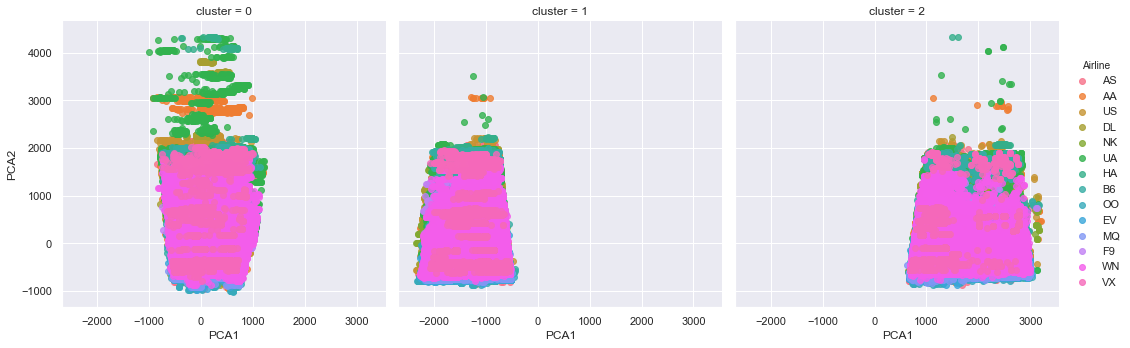

In [ ]:
flights['cluster'] = pred
sns.lmplot("PCA1", "PCA2", data=flights, hue='Airline',
           col='cluster', fit_reg=False);

# Meaningful data Extraction

#### Q. Which Arilines have the most "On time" flights?

In [ ]:
data = flights[['Airline','Flight number','Tail number','Origin airport','Destination airport','Scheduled departure',
                'Departure time','Departure delay','Taxi out','Wheels off','Scheduled time','Elapsed time','Air time',
                'Distance','Wheels on','Taxi in','Scheduled arrival','Arrival time','Arrival delay','Arrival delay status','Diverted','On time','Cancelled','Cancelled reason','Status']]
#Fill nan values with 0
data = data.fillna(0)
cols = [col for col in data.columns if col not in ['On time']]
dataset = data[cols]
target = data['On time']
#Predict the labels using naive bayse impplemented above
pred,xtest_ = NaiveBayes(dataset,target)
pred = pred.astype(int)
pred = pred.tolist()
#Merge predictions with test data frame
xtest_['prediction'] = pred
#Find the maximum row on the basis of "Airline"
xtest_['Airline_Ontime']=xtest_.groupby('Airline')['prediction'].transform('sum')
#Find indices of required columns
airline_index = xtest_.columns.get_loc("Airline")
Ontime_index = xtest_.columns.get_loc("Airline_Ontime")
#Extarct the maximum rows
ans=xtest_[xtest_.Airline_Ontime == xtest_.Airline_Ontime.max()]
#Convert to numpy array to print result
ans = ans.to_numpy()
print("Airline:")
print(ans[0][airline_index])
print("Has maximum number of on time flights which is:")
print(ans[0][Ontime_index])

Accuracy to predict whether the flight is cancelled or not :  0.9983851125176032
Airline:
WN
Has maximum number of on time flights which is:
41562


#### Q. Which Arilines have the least "On time" flights?

In [ ]:
#Extarct the maximum rows
ans=xtest_[xtest_.Airline_Ontime == xtest_.Airline_Ontime.min()]
#Convert to numpy array to print result
ans = ans.to_numpy()
print("Airline:")
print(ans[0][airline_index])
print("has minimum number of on time flights which is:")
print(ans[0][Ontime_index])

Airline:
VX
has minimum number of on time flights which is:
1784


#### Q. Which Airlines have the most "Cancelled" flights

In [ ]:
data = flights[['Airline','Flight number','Tail number','Origin airport','Destination airport','Scheduled departure',
                'Departure time','Departure delay','Taxi out','Wheels off','Scheduled time','Elapsed time','Air time',
                'Distance','Wheels on','Taxi in','Scheduled arrival','Arrival time','Arrival delay','Arrival delay status','Diverted','On time','Cancelled','Cancelled reason','Status']]
#Fill nan values with 0
data = data.fillna(0)
cols = [col for col in data.columns if col not in ['On time']]
dataset = data[cols]
target = data['Cancelled']
#Predict the labels using naive bayse impplemented above
pred,xtest_ = NaiveBayes(dataset,target)
pred = pred.astype(int)
pred = pred.tolist()
#Merge predictions with test data frame
xtest_['prediction'] = pred
#Find the maximum row on the basis of "Airline"
xtest_['Airline_Cancelled']=xtest_.groupby('Airline')['prediction'].transform('sum')
#Find indices of required columns
airline_index = xtest_.columns.get_loc("Airline")
cancel_index = xtest_.columns.get_loc("Airline_Cancelled")
#Extarct the maximum rows
ans=xtest_[xtest_.Airline_Cancelled == xtest_.Airline_Cancelled.max()]
#Convert to numpy array to print result
ans = ans.to_numpy()
print("Airline:")
print(ans[0][airline_index])
print("has maximum number of cancelled flights which is:")
print(ans[0][cancel_index])

Accuracy to predict whether the flight is cancelled or not :  0.9999777476134315
Airline:
WN
has maximum number of cancelled flights which is:
1945


#### Q. Which Arilines have the least "Cancelled" flights?

In [ ]:
#Extarct the maximum rows
ans=xtest_[xtest_.Airline_Cancelled == xtest_.Airline_Cancelled.min()]
#Convert to numpy array to print result
ans = ans.to_numpy()
print("Airline:")
print(ans[0][airline_index])
print("has minimum number of cancelled flights which is:")
print(ans[0][cancel_index])

Airline:
HA
has minimum number of cancelled flights which is:
6


#### Q. Which Arilines have the most "Diverted" flights

In [ ]:
data = flights[['Airline','Flight number','Tail number','Origin airport','Destination airport','Scheduled departure',
                'Departure time','Departure delay','Taxi out','Wheels off','Scheduled time','Elapsed time','Air time',
                'Distance','Wheels on','Taxi in','Scheduled arrival','Arrival time','Arrival delay','Arrival delay status','Diverted','On time','Cancelled','Cancelled reason','Status']]
#Fill nan values with 0
data = data.fillna(0)
cols = [col for col in data.columns if col not in ['On time']]
dataset = data[cols]
target = data['Diverted']
#Predict the labels using naive bayse impplemented above
pred,xtest_ = NaiveBayes(dataset,target)
pred = pred.astype(int)
pred = pred.tolist()
#Merge predictions with test data frame
xtest_['prediction'] = pred
#Find the maximum row on the basis of "Airline"
xtest_['Airline_divert']=xtest_.groupby('Airline')['prediction'].transform('sum')
#Find indices of required columns
airline_index = xtest_.columns.get_loc("Airline")
divert_index = xtest_.columns.get_loc("Airline_divert")
#Extarct the maximum rows
ans=xtest_[xtest_.Airline_divert == xtest_.Airline_divert.max()]
#Convert to numpy array to print result
ans = ans.to_numpy()
print("Airline:")
print(ans[0][airline_index])
print("Has maximum number of on divert flights which is:")
print(ans[0][divert_index])

Accuracy to predict whether the flight is cancelled or not :  0.9999968210876331
Airline:
WN
Has maximum number of on divert flights which is:
134


#### Q. Which Arilines have the least "Diverted" flights?

In [ ]:

#Extarct the minimum rows
ans=xtest_[xtest_.Airline_divert == xtest_.Airline_divert.min()]
#Convert to numpy array to print result
ans = ans.to_numpy()
print("Airline:")
print(ans[0][airline_index])
print("Has minimum number of on divert flights which is:")
print(ans[0][divert_index])

Airline:
HA
Has minimum number of on divert flights which is:
2


#### Q. Which Airlines have the most "Highly delayed" flights

In [ ]:
data = flights[['Airline','Flight number','Tail number','Origin airport','Destination airport','Scheduled departure',
                'Departure time','Departure delay','Taxi out','Wheels off','Scheduled time','Elapsed time','Air time',
                'Distance','Wheels on','Taxi in','Scheduled arrival','Arrival time','Arrival delay','Arrival delay status','Diverted','On time','Cancelled','Cancelled reason','Status']]
#Fill nan values with 0
data = data.fillna(0)
cols = [col for col in data.columns]# if col not in ['Status']]
dataset = data[cols]
target = data['Status']
pred,xtest_ = RandomForest(dataset,target)
#Merge predictions with test data frame
xtest_['prediction'] = pred
#Find the maximum row on the basis of "Airline"
xtest_['Airline_delay']=xtest_.groupby('Airline')['prediction'].transform('sum')
#Find indices of required columns
airline_index = xtest_.columns.get_loc("Airline")
delay_index = xtest_.columns.get_loc("Airline_delay")
#Extarct the maximum rows
ans=xtest_[xtest_.Airline_delay == xtest_.Airline_delay.max()]
#Convert to numpy array to print result
ans = ans.to_numpy()
print("Airline:")
print(ans[0][airline_index])
print("Has maximum number of on Highly delayed flights which is:")
print(ans[0][delay_index])


Accuracy score at each iteration of hyperparameters:  0.9995756145244737
Accuracy score at each iteration of hyperparameters:  0.9998283384593377

Number of trees in Random forest will be:  8 
Depth of each tree will be:  7

Accuracy score to predict Test dataset examples is  0.9999841054381654

Airline:
WN
Has maximum number of on Highly delayed flights which is:
21760.0


#### Q. Which Airlines have the least "Highly delayed" flights?

In [ ]:
#Extarct the maximum rows
ans=xtest_[xtest_.Airline_delay == xtest_.Airline_delay.min()]
#Convert to numpy array to print result
ans = ans.to_numpy()
print("Airline:")
print(ans[0][airline_index])
print("Has minimum number of on highly delayed flights which is:")
print(ans[0][delay_index])

Airline:
HA
Has minimum number of on highly delayed flights which is:
663.0


#### Q. Which Airlines face the most "Airsystem delay"?

In [ ]:
data = flights[['Airline','Flight number','Tail number','Origin airport','Destination airport','Scheduled departure',
                'Departure time','Departure delay','Taxi out','Wheels off','Scheduled time','Elapsed time','Air time',
                'Distance','Wheels on','Taxi in','Scheduled arrival','Arrival time','Arrival delay','Arrival delay status',
                'Diverted','On time','Cancelled','Cancelled reason','Air system delay','Security delay','Airline delay',
                'Late aircraft delay','Weather delay']]
#Fill nan values with 0
data = data.fillna(0)
cols = [col for col in data.columns]# if col not in ['Cancelled reason']]
dataset = data[cols]
target = pd.to_numeric(data['Cancelled reason'])
pred,xtest_ = NaiveBayes(dataset,target)
pred = pred.astype(int)
pred = pred.tolist()
#Merge predictions with test data frame
xtest_['prediction'] = pred
#Find the maximum row on the basis of "Airline"
Cancel_Reason = xtest_.groupby(['Cancelled reason'])
Airline_= xtest_.groupby(['Cancelled reason','Airline'])
xtest_['Airline_delay']=xtest_.groupby('Airline')['prediction'].transform('sum')

a1=Airline_['prediction'].agg([np.sum])
a1= a1.to_numpy()
a1 = a1.astype(int)
max_val=(np.amax(a1, axis=0)).item()
ind0=np.argmax(a1,axis = 0)
index0=ind0.item()
arr=Cancel_Reason['prediction'].agg([np.sum])

arr = arr.to_numpy()
arr = arr.astype(int)
airline_index=(np.argmax(arr,axis = 0)).item()

#Extarct the maximum rows
ans=xtest_[xtest_.Airline_delay == xtest_.Airline_delay.max()]
#Convert to numpy array to print result
ans = ans.to_numpy()
print("Airline:")
print(ans[0][airline_index])
print("Has maximum number of flights that faces the most ",Creason[airline_index],":")
print(max_val)


Accuracy to predict whether the flight is cancelled or not :  0.9502118745092554
Airline:
WN
Has maximum number of flights that faces the most  Airsystem delay :
7824


#### Q. Which Airlines face the least "Airsystem delay"?

In [ ]:
min_val=(np.amin(a1, axis=0)).item()
ind0=np.argmax(a1,axis = 0)
index0=ind0.item()
arr=Cancel_Reason['prediction'].agg([np.sum])

arr = arr.to_numpy()
arr = arr.astype(int)
airline_index=(np.argmax(arr,axis = 0)).item()

#Extarct the maximum rows
ans=xtest_[xtest_.Airline_delay == xtest_.Airline_delay.min()]
#Convert to numpy array to print result
ans = ans.to_numpy()
print("Airline:")
print(ans[0][airline_index])
print("Has minimum number of flights that faces the ",Creason[airline_index],":")
print(min_val)


Airline:
VX
Has minimum number of flights that faces the  Airsystem delay :
0
